Phantom of the Opera Script Here: https://www.allmusicals.com/lyrics/phantomoftheoperathe/script.htm
      
Code  
Wordcloud package documentation
- http://amueller.github.io/word_cloud/auto_examples/index.html
- https://github.com/amueller/word_cloud

Inspiration  
Tiger King Twitter portrait
- https://towardsdatascience.com/understanding-the-tiger-king-and-his-tweets-through-python-b928f92af05d  

Twitter word clouds
- https://medium.com/@shsu14/introduction-to-data-science-custom-twitter-word-clouds-704ec5538f46

data is sometimes difficult to understand. To some, data is a screen filled with zeros and ones surging across the monitor to alien-like digital beeps. That is why data visualization is so important! Personally, I am not a huge fan of theater and operas, and if I was to read through a script, I would swear I've found a cure to insomnia. In this project, I've tried to capture the gist of a famous theatrical show using a picture and a word cloud. They say a picture is worth a thousand words and voila! [show word cloud] they weren't kidding. 

In [52]:
import nltk
from nltk.corpus import stopwords

In [2]:
from collections import Counter
import matplotlib.pyplot as plt

In [3]:
import pandas as pd

In [4]:
# Remove punctuation and common words like "the", "a", "if", etc. aka stop words
import string

In [ ]:
from selenium import webdriver

In [5]:
# Download the stopwords package from the interactive shell
# nltk.download_shell()

In [6]:
# read in file containing the full script of the musical
script = open('Script.txt')
message = script.read()
script.close()

In [7]:
message[:500]

'THE STAGE OF THE PARIS OPERA, 1905\n(The contents of the opera house is being\nauctioned off. An AUCTIONEER, PORTERS,\nBIDDERS, and RAOUL, seventy now, but still\nbright of eye. The action commences with a\nblow from the AUCTlONEER\'s gavel)\n\nAUCTIONEER\nSold. Your number, sir? Thank you.\n\nLot 663, then, ladies and gentlemen: a poster\nfor this house\'s production of "Hannibal" by\nChalumeau.\n\nPORTER\nShowing here.\n\nAUCTIONEER\nDo I have ten francs? Five then. Five I am bid.\nSix, seven. Against you, sir, se'

From looking at the first 500 characters of the script, we can see there are certain elements we want to leave off the wordcloud. For example, there are a lot of newline characters represented by '\n'. We also see a lot of upper case words like AUCTIONEER, PORTERS, and RAOUL that signal each character's actions or lines. Other capitalized words like "THE STAGE OF THE PARIS OPERA" describe the setting of the play. Because all of these words aren't spoken in the play, I will take them out of the analysis.     

In [8]:
# replace all line breaks with a single space.
message = message.replace('\n', ' ')

In [9]:
message[:200]

'THE STAGE OF THE PARIS OPERA, 1905 (The contents of the opera house is being auctioned off. An AUCTIONEER, PORTERS, BIDDERS, and RAOUL, seventy now, but still bright of eye. The action commences with '

In [10]:
# Python's built in string library contains all the punctuation marks
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [11]:
# remove all the punctuation from the message using list comprehension
no_punc_message = [c for c in message if c not in string.punctuation]

In [12]:
# no_punc_message

In [13]:
# put the message back together
no_punc_message = ''.join(no_punc_message)

In [14]:
no_punc_message[:200]

'THE STAGE OF THE PARIS OPERA 1905 The contents of the opera house is being auctioned off An AUCTIONEER PORTERS BIDDERS and RAOUL seventy now but still bright of eye The action commences with a blow fr'

In [15]:
# remove all the words that are Capitalized since they represent a character speaking or setting the stage
message = [word.lower() for word in no_punc_message.split() if not word.isupper()]

In [16]:
message = ' '.join(message)

In [17]:
message[:200]

'1905 the contents of the opera house is being auctioned off an and seventy now but still bright of eye the action commences with a blow from the auctloneers gavel sold your number sir thank you lot 66'

In [18]:
words = [word for word in message.split()]

To get common phrases within the script, I create a counter for the most common n-grams. This approach returns the most common phrases. However, a similar approach with very important subtle differences is finding collocations. According to Wikipedia, "a collocation is a series of words or terms that co-occur more often than would be expected by chance." Whereas the first approach that returns the most frequent phrases can end up with an overrepresentation of phrases made up of common words (i.e. "is a"), collocations return the more interesting and informative phrases.

A few definitions: a bigram is "a pair of consecutive written units such as letters, syllables, or words." from the Oxford dictionary. 
Similarly, a trigram is a group of 3 such elements, and an n-gram is a sequence of n items. 

The nltk library has a BigramCollocationFinder and a TrigramCollocationFinder, but I didn't find and out-of-the-box solutions for collocations greater than trigrams. Once the bigrams or trigrams are extracted form the data, you can then find the ones that have the highest likelihood ratio to find the words that are paired more than you would expect them to by random chance.

Let's illustrate this point. First, I will just look at the most frequently occuring bigrams, NOT bigram collocations.

In [19]:
# https://stackoverflow.com/questions/12488722/counting-bigrams-pair-of-two-words-in-a-file-using-python
# Python has a ngram function as part of NLTK library which helps us generate ngrams.
dic = dict(Counter(nltk.ngrams(words,2)).most_common(10))
dic

{('of', 'the'): 65,
 ('in', 'the'): 29,
 ('the', 'opera'): 27,
 ('to', 'the'): 27,
 ('from', 'the'): 18,
 ('think', 'of'): 18,
 ('angel', 'of'): 18,
 ('at', 'the'): 17,
 ('as', 'the'): 17,
 ('of', 'music'): 17}

In [20]:
for key, val in dic.items():
#     print(key)
    print(' '.join(list(key)))

of the
in the
the opera
to the
from the
think of
angel of
at the
as the
of music


You can see that we returned a lot of common word phrases that are not surprising or interesting
Next I'll use the BigramCollocationFinder to find bigram collocations

In [21]:
# Code adpated from https://www.geeksforgeeks.org/nlp-word-collocations/
# use to find bigrams, which are pairs of words 
from nltk.collocations import BigramCollocationFinder 
from nltk.metrics import BigramAssocMeasures 

bigram_collocation = BigramCollocationFinder.from_words(words) 
# only bigrams that appear 3+ times
bigram_collocation.apply_freq_filter(3) 
# return the 10 bigrams with the highest likelihood_ratio
bigram_collocation.nbest(BigramAssocMeasures.likelihood_ratio, 10)

[('prima', 'donna'),
 ('of', 'the'),
 ('miss', 'daae'),
 ('the', 'opera'),
 ('think', 'of'),
 ('phantom', 'of'),
 ('dressing', 'room'),
 ('box', 'five'),
 ('angel', 'of'),
 ('christine', 'daae')]

The bigram collocations definitely look more interesting than before. But I don't have a frequency count for collocations. Instead, I have a 'score' for each n-gram scored according to some association measure in order to determine the relative likelihood of each ngram being a collocation.

In [22]:
bigram_collocation.score_ngrams(BigramAssocMeasures.likelihood_ratio)[:10]

[(('prima', 'donna'), 142.5078058555988),
 (('of', 'the'), 128.836495677668),
 (('miss', 'daae'), 113.13111810294518),
 (('the', 'opera'), 104.66023952895308),
 (('think', 'of'), 97.44155979363116),
 (('phantom', 'of'), 96.57473352394359),
 (('dressing', 'room'), 93.91130727807256),
 (('box', 'five'), 88.75552542354752),
 (('angel', 'of'), 86.34683864896587),
 (('christine', 'daae'), 78.60479872835324)]

Now I do the same thing with trigrams

In [23]:
dic = dict(Counter(nltk.ngrams(words,3)).most_common(10))
dic

{('of', 'the', 'opera'): 19,
 ('angel', 'of', 'music'): 17,
 ('phantom', 'of', 'the'): 15,
 ('the', 'phantom', 'of'): 13,
 ('think', 'of', 'me'): 9,
 ('ladies', 'and', 'gentlemen'): 8,
 ('the', 'angel', 'of'): 7,
 ('the', 'opera', 'is'): 5,
 ('the', 'opera', 'house'): 4,
 ('sad', 'to', 'return'): 4}

In [24]:
for key, val in dic.items():
#     print(key)
    print(' '.join(list(key)))

of the opera
angel of music
phantom of the
the phantom of
think of me
ladies and gentlemen
the angel of
the opera is
the opera house
sad to return


In [25]:
# Loading Libraries 
from nltk.collocations import TrigramCollocationFinder 
from nltk.metrics import TrigramAssocMeasures 
  
trigram_collocation = TrigramCollocationFinder.from_words(words) 
trigram_collocation.apply_freq_filter(3) 
  
trigram_collocation.nbest(TrigramAssocMeasures.likelihood_ratio, 15) 

[('of', 'the', 'opera'),
 ('the', 'phantom', 'of'),
 ('angel', 'of', 'music'),
 ('phantom', 'of', 'the'),
 ('the', 'angel', 'of'),
 ('the', 'arrival', 'of'),
 ('the', 'role', 'of'),
 ('the', 'music', 'of'),
 ('sing', 'prima', 'donna'),
 ('prima', 'donna', 'once'),
 ('think', 'of', 'me'),
 ('ladies', 'and', 'gentlemen'),
 ('the', 'opera', 'house'),
 ('of', 'the', 'night'),
 ('of', 'the', 'music')]

In [26]:
dict(Counter(nltk.ngrams(words,4)).most_common(10))

{('phantom', 'of', 'the', 'opera'): 15,
 ('the', 'phantom', 'of', 'the'): 13,
 ('the', 'angel', 'of', 'music'): 7,
 ('of', 'the', 'opera', 'is'): 5,
 ('think', 'of', 'me', 'think'): 4,
 ('of', 'me', 'think', 'of'): 4,
 ('the', 'music', 'of', 'the'): 4,
 ('music', 'of', 'the', 'night'): 4,
 ('thats', 'all', 'ask', 'of'): 4,
 ('all', 'ask', 'of', 'you'): 4}

In [27]:
dict(Counter(nltk.ngrams(words,5)).most_common(10))

{('the', 'phantom', 'of', 'the', 'opera'): 13,
 ('phantom', 'of', 'the', 'opera', 'is'): 5,
 ('think', 'of', 'me', 'think', 'of'): 4,
 ('the', 'music', 'of', 'the', 'night'): 4,
 ('thats', 'all', 'ask', 'of', 'you'): 4,
 ('of', 'me', 'think', 'of', 'me'): 3,
 ('hes', 'there', 'the', 'phantom', 'of'): 3,
 ('there', 'the', 'phantom', 'of', 'the'): 3,
 ('sing', 'prima', 'donna', 'once', 'more'): 3,
 ('say', 'youll', 'share', 'with', 'me'): 3}

In [28]:
# stopwords.words('english')

In [29]:
clean_message = [word for word in message.split() if word.lower() not in stopwords.words('english')]

In [30]:
clean_message = ' '.join(clean_message)

In [31]:
clean_message[:200]

'1905 contents opera house auctioned seventy still bright eye action commences blow auctloneers gavel sold number sir thank lot 663 ladies gentlemen poster houses production hannibal chalumeau showing '

In [32]:
cleaned_words = [word for word in clean_message.split()]

In [33]:
c = Counter(cleaned_words)        

In [34]:
c.most_common(68)

[('christine', 47),
 ('opera', 41),
 ('music', 37),
 ('angel', 36),
 ('think', 29),
 ('dont', 27),
 ('please', 24),
 ('monsieur', 24),
 ('one', 24),
 ('take', 21),
 ('daae', 21),
 ('masquerade', 21),
 ('box', 20),
 ('see', 20),
 ('us', 19),
 ('man', 19),
 ('must', 19),
 ('let', 19),
 ('face', 19),
 ('gentlemen', 18),
 ('phantom', 18),
 ('say', 18),
 ('go', 18),
 ('never', 17),
 ('stage', 17),
 ('scene', 17),
 ('love', 17),
 ('know', 17),
 ('well', 17),
 ('sing', 17),
 ('voice', 17),
 ('signora', 16),
 ('raoul', 15),
 ('new', 15),
 ('look', 15),
 ('im', 15),
 ('behind', 15),
 ('night', 15),
 ('find', 14),
 ('shall', 14),
 ('still', 13),
 ('little', 13),
 ('mind', 13),
 ('miss', 13),
 ('chandelier', 12),
 ('seen', 12),
 ('hear', 12),
 ('come', 12),
 ('youll', 12),
 ('world', 12),
 ('five', 11),
 ('away', 11),
 ('andre', 11),
 ('hes', 11),
 ('room', 11),
 ('ladies', 10),
 ('said', 10),
 ('may', 10),
 ('great', 10),
 ('two', 10),
 ('back', 10),
 ('carlotta', 10),
 ('remember', 10),
 ('arou

Let's visualize the words in the Phantom of the Opera

In [35]:
# Code adapted from https://towardsdatascience.com/understanding-the-tiger-king-and-his-tweets-through-python-b928f92af05d
# Analyze Frequency
frequency_dist = nltk.FreqDist(cleaned_words)
word_dict = sorted((value, key) for (key,value) in frequency_dist.items())
x, y = zip(*word_dict) # unpack a list of pairs into two tuples

findfont: Font family ['Arial Black'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial Black'] not found. Falling back to DejaVu Sans.


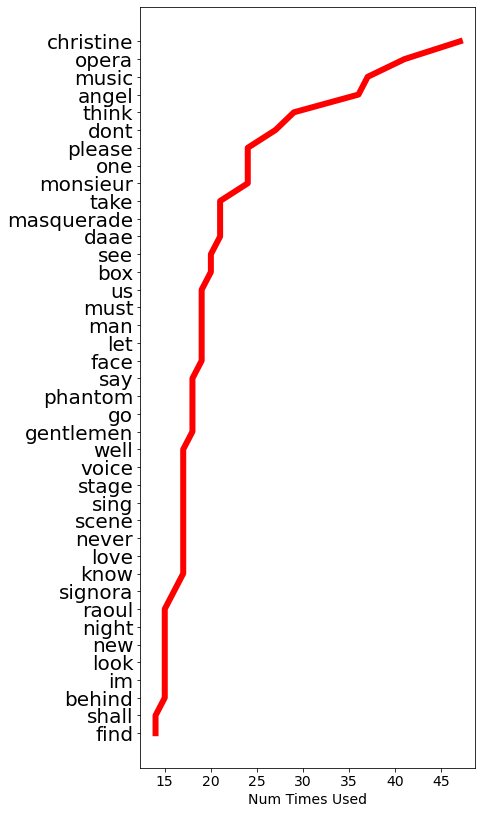

In [36]:
import matplotlib.pyplot as plt
num_to_show = 40
plt.figure(figsize=[6,14])
plt.plot(x[-num_to_show:], y[-num_to_show:],lw=6,c='r')
plt.yticks(fontname = "Arial Black", fontsize=20)
plt.xlabel('Num Times Used',fontsize=14, fontname = "Arial Black")
plt.xticks(fontsize=14, fontname = "Arial Black")
# plt.savefig("joes_most_common_terms.png", format="png")
plt.show()

In [37]:
most_common_words_df = pd.DataFrame(c.most_common(68), columns=['Word(s)', 'Count'])
most_common_words_df.head()

,Word(s),Count
0,christine,47
1,opera,41
2,music,37
3,angel,36
4,think,29


In [92]:
# copy the dataframe to clipboard. The excel argument copies in a CSV format, and I leave off the indices and header row  
most_common_words_df.to_clipboard(excel=True, index=False, header=False)

# Creating Word Cloud in Browser
This section automatically launches a web browser that goes to wordart.com and populates the text input with the words and frequency you have extracted from the movie script

For the next part, you will have to download a driver. Every browser has its own driver. Selenium is just a tool which enables to you to "talk" to the browser. Here, I will be using Google Chrome as my preferred browser. You can download the ChromeDriver here: https://sites.google.com/a/chromium.org/chromedriver/downloads

Then you have multiple options:
1) add it to your system path https://zwbetz.com/download-chromedriver-binary-and-add-to-your-path-for-automated-functional-testing/
2) put it in the same directory as your python script
3) specify the location directly via executable_path like:
driver = webdriver.Chrome(executable_path='C:/path/to/chromedriver.exe')

Source: https://stackoverflow.com/questions/40555930/selenium-chromedriver-executable-needs-to-be-in-path

I understand the following code is not super helpful in the sense that it takes more time and effort to automate this process than to navigate to wordart.com in your own browser and paste your words into the UI yourself. I did this for my self-learning and practicing concepts for using selenium, but feel free to skip over this section. 

In [94]:
from selenium.webdriver.chrome.options import Options
chrome_options = Options()
# incognito window
# chrome_options.add_argument("--incognito")
chrome_options.add_argument('start-maximized')

browser = webdriver.Chrome(options=chrome_options)
browser.get('https://wordart.com/create')

# When a page is loaded by the browser, the elements within that page may load at different time intervals. 
# If an element has not yet loaded in the webpage, the find_element_by_css_selector function may raise an NoSuchElementException exception. 
# Using waits, we can solve this issue. An implicit wait makes WebDriver poll the page for a certain amount of time when trying to locate an element, before throwing an exception.
# https://selenium-python.readthedocs.io/waits.html
browser.implicitly_wait(10) # seconds

# select the Import button under the WORDS banner using the CSS selector
words_import_elem = browser.find_element_by_css_selector('#root > div > div.app-body > div.app-body-pane.app-body-left-pane > div > div.accordion-section.selected > div.accordion-section-body > div > div:nth-child(1) > span.words-import > button') 
words_import_elem.click()
# select the text box and paste in words and values that were copied onto the clipboard
textbox_elem = browser.find_element_by_css_selector('body > div:nth-child(14) > div > div.modal.fade.show > div > div > div.modal-body > div:nth-child(1) > textarea')
textbox_elem.click()
import pyautogui #allows you to control your keyboard using python
pyautogui.hotkey('ctrl', 'v')
# make sure the CSV format box is checked if importing from Excel
checkbox_elem = browser.find_element_by_css_selector('body > div:nth-child(14) > div > div.modal.fade.show > div > div > div.modal-body > div.words-import-options > span.component-checkbox.noselect.words-import-options-csv-format > label > div')
checkbox_elem.click() 
# click the import words button to submit
import_words_elem = browser.find_element_by_css_selector('body > div:nth-child(14) > div > div.modal.fade.show > div > div > div.modal-footer > button.btn.btn-dark')
import_words_elem.click()
# click the visualize button to visualize the word cloud
visualize_elem = browser.find_element_by_css_selector('#root > div > div.app-body > div.app-body-pane.app-body-right-pane > div.sub-panel > button.btn.btn-danger')
visualize_elem.click()


# use opencv to make my own picture, like make mask negative and add a rose
# use pyautogui to paste to wordart and design word cloud.   

The last step is to consult with Emily about the most common words, importance of the  bigrams and collocations, and of course how the word cloud design.
Like any major data science project, working closely with the subject matter experts is critical to a prject's success. [insert  something to elaborate on this idea]
